In [1974]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set_theme()

In [1975]:
advertising = pd.read_csv("../../data/advertising.csv", index_col="Unnamed: 0")
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [1976]:
advertising

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [1977]:
advertising[advertising.columns] = StandardScaler().fit_transform(advertising)
advertising.head()

,TV,Radio,Newspaper,Sales
1,0.969852,0.981522,1.778945,1.552053
2,-1.197376,1.082808,0.669579,-0.696046
3,-1.516155,1.528463,1.783549,-0.907406
4,0.052050,1.217855,1.286405,0.860330
5,0.394182,-0.841614,1.281802,-0.215683


GPR example

In [1978]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X, y)
gpr.score(X, y)
gpr.predict(X[:1,:], return_std=True), X.shape, y.shape

c:\Users\nikok\mambaforge\envs\oml\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\nikok\mambaforge\envs\oml\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


((array([653.08792288]), array([316.68016218])), (500, 4), (500,))

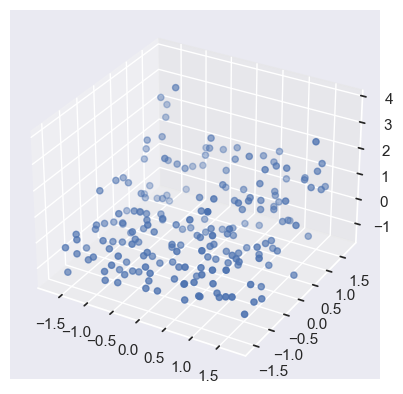

In [1979]:
X = advertising[["TV", "Radio", "Newspaper"]].to_numpy()
y = advertising["Sales"].to_numpy()
ax = plt.figure().add_subplot(projection = "3d")
ax.scatter3D(X.T[0], X.T[1], X.T[2])

Correlation between each of the xs to y

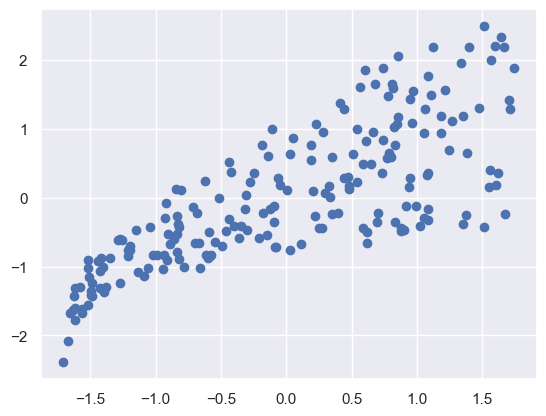

In [1980]:
plt.scatter(advertising["TV"], advertising["Sales"])

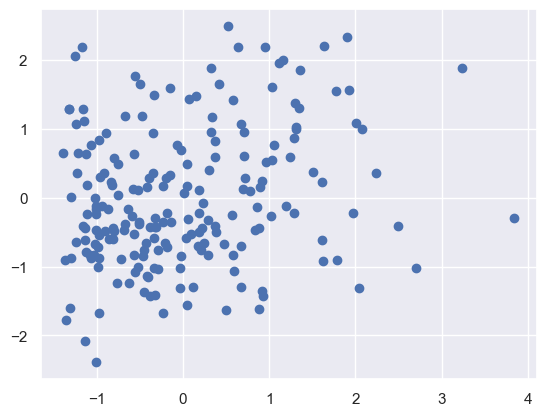

In [1981]:
plt.scatter(advertising["Newspaper"], advertising["Sales"])

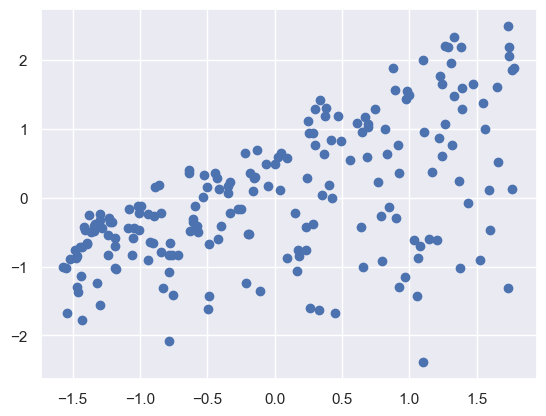

In [1982]:
plt.scatter(advertising["Radio"], advertising["Sales"])

PCA to reduce input dims to 2

[16.55809475 14.02323885]


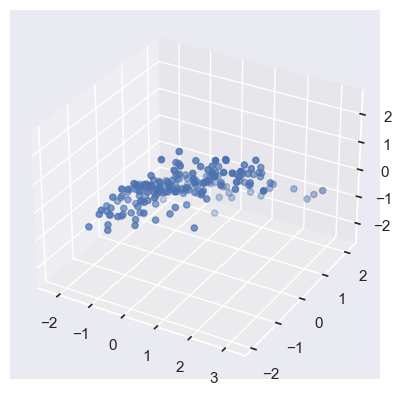

In [1983]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
print(pca.singular_values_)
ax = plt.figure().add_subplot(projection = "3d")
ax.scatter3D(X.T[0], X.T[1], y)

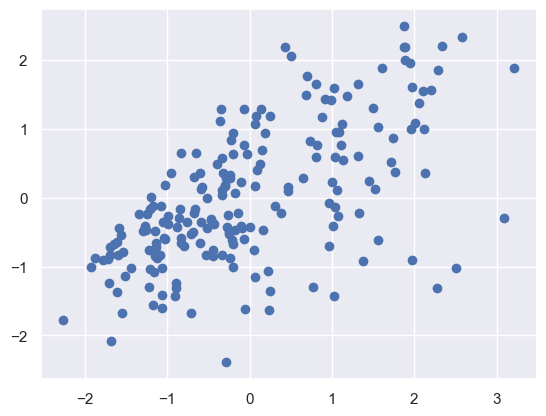

In [1984]:
plt.scatter(X.T[0], y)

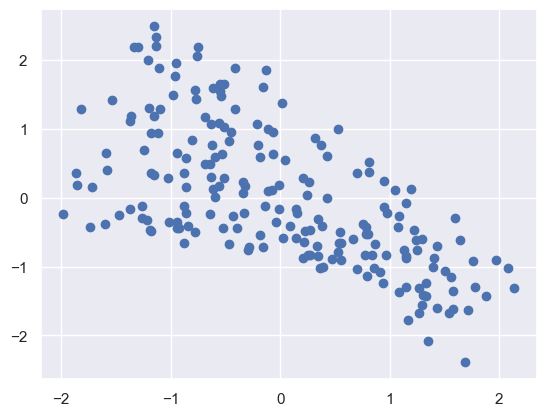

In [1985]:
plt.scatter(X.T[1], y)

In [1986]:
gpr = GaussianProcessRegressor(normalize_y=True)
gpr.fit(X, y)

GaussianProcessRegressor(normalize_y=True)

In [1987]:
X[0]

array([ 2.1111237 , -0.54502721])

In [1988]:
gpr.predict(X[:1,:])

array([1.56023407])

In [1989]:
np.min(X.T[0]), np.max(X.T[0]), np.min(X.T[1]), np.max(X.T[1])

(-2.2654077269492543,
 3.211688086776323,
 -1.980987088071259,
 2.1344416714158383)

In [1990]:
u = np.linspace(-2.275, 3.25, 1000)
v = np.linspace(-2, 2.125, 1000)
U, V = np.meshgrid(u, v)
U.shape, V.shape, U, V

((1000, 1000),
 (1000, 1000),
 array([[-2.275     , -2.26946947, -2.26393894, ...,  3.23893894,
          3.24446947,  3.25      ],
        [-2.275     , -2.26946947, -2.26393894, ...,  3.23893894,
          3.24446947,  3.25      ],
        [-2.275     , -2.26946947, -2.26393894, ...,  3.23893894,
          3.24446947,  3.25      ],
        ...,
        [-2.275     , -2.26946947, -2.26393894, ...,  3.23893894,
          3.24446947,  3.25      ],
        [-2.275     , -2.26946947, -2.26393894, ...,  3.23893894,
          3.24446947,  3.25      ],
        [-2.275     , -2.26946947, -2.26393894, ...,  3.23893894,
          3.24446947,  3.25      ]]),
 array([[-2.        , -2.        , -2.        , ..., -2.        ,
         -2.        , -2.        ],
        [-1.99587087, -1.99587087, -1.99587087, ..., -1.99587087,
         -1.99587087, -1.99587087],
        [-1.99174174, -1.99174174, -1.99174174, ..., -1.99174174,
         -1.99174174, -1.99174174],
        ...,
        [ 2.11674174,  2

In [1991]:
a = np.expand_dims(np.ravel(U), 1)
a.shape, a

((1000000, 1),
 array([[-2.275     ],
        [-2.26946947],
        [-2.26393894],
        ...,
        [ 3.23893894],
        [ 3.24446947],
        [ 3.25      ]]))

In [1992]:
a = np.concatenate([np.expand_dims(np.ravel(U), axis=1), np.expand_dims(np.ravel(V), axis=1)], axis=1)
a.shape, a

((1000000, 2),
 array([[-2.275     , -2.        ],
        [-2.26946947, -2.        ],
        [-2.26393894, -2.        ],
        ...,
        [ 3.23893894,  2.125     ],
        [ 3.24446947,  2.125     ],
        [ 3.25      ,  2.125     ]]))

In [1993]:
zs = gpr.predict(a)
zs.shape, zs

((1000000,),
 array([-3096.70645165, -3057.80564272, -3019.0681057 , ...,
          338.70295182,   343.4329337 ,   348.18397591]))

In [1994]:
Z = np.reshape(zs, U.shape)
Z.shape, Z

((1000, 1000),
 array([[-3096.70645165, -3057.80564272, -3019.0681057 , ...,
          4159.99230921,  4158.23471063,  4156.16736895],
        [-3067.00781953, -3028.43862724, -2990.03205061, ...,
          4119.73714221,  4117.97132832,  4115.89849216],
        [-3037.44793642, -2999.20907402, -2961.13216472, ...,
          4079.57685429,  4077.80269277,  4075.72423297],
        ...,
        [  642.81035471,   633.54480684,   624.35507929, ...,
           331.97028643,   336.62966358,   341.31015854],
        [  648.08506036,   638.76115203,   629.51355684, ...,
           335.35201664,   340.04669107,   344.76245276],
        [  653.36235344,   643.98039067,   634.67524278, ...,
           338.70295182,   343.4329337 ,   348.18397591]]))

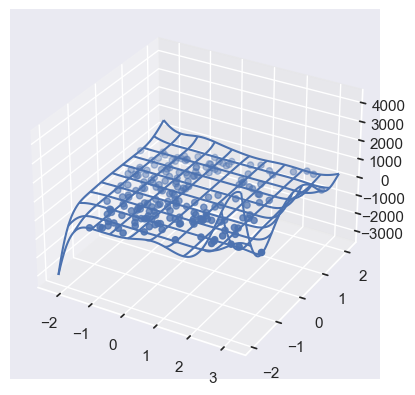

In [1995]:
ax = plt.figure().add_subplot(projection = "3d")
ax.scatter3D(X.T[0], X.T[1], y)
ax.plot_wireframe(U, V, Z, rstride=100, cstride=100)
# ax.set_zlim3d(-10, 10)

In [1996]:
X.T[1:].T.shape

(200, 1)

In [1997]:
np.expand_dims(u, axis=1).shape

(1000, 1)

In [1998]:
z1, std1 = gpr.fit(X.T[:1].T, y).predict(np.expand_dims(u, axis=1), return_std=True)
z2, std2 = gpr.fit(X.T[1:].T, y).predict(np.expand_dims(v, axis=1), return_std=True)

In [1999]:
def plot_gaussian(x, u, z, std):
    plt.fill_between(u, z - 3e5*std, z + 3e5*std, color="lightblue")
    plt.scatter(x, y)
    plt.plot(u, z)

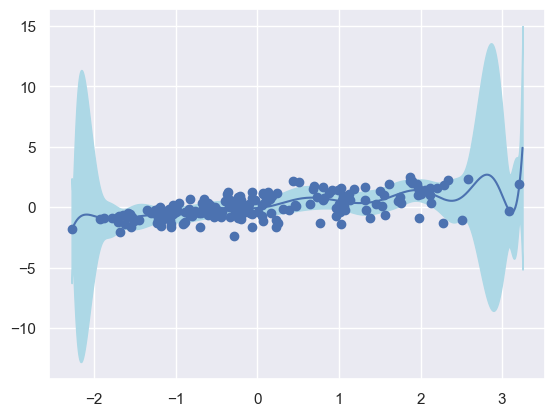

In [2000]:
plot_gaussian(X.T[0], u, z1, std1)

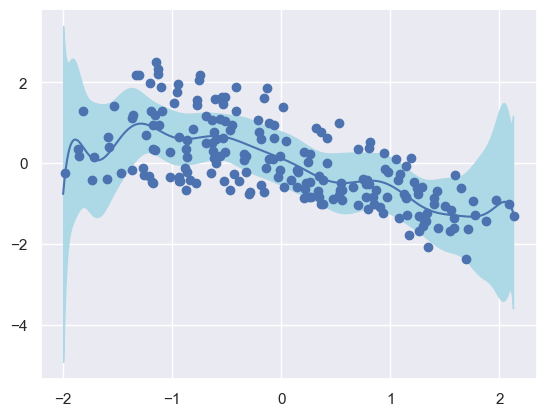

In [2001]:
plot_gaussian(X.T[1], v, z2, std2)

In [2002]:
U[0], V[0], Z[0]

(array([-2.27500000e+00, -2.26946947e+00, -2.26393894e+00, -2.25840841e+00,
        -2.25287788e+00, -2.24734735e+00, -2.24181682e+00, -2.23628629e+00,
        -2.23075576e+00, -2.22522523e+00, -2.21969469e+00, -2.21416416e+00,
        -2.20863363e+00, -2.20310310e+00, -2.19757257e+00, -2.19204204e+00,
        -2.18651151e+00, -2.18098098e+00, -2.17545045e+00, -2.16991992e+00,
        -2.16438939e+00, -2.15885886e+00, -2.15332833e+00, -2.14779780e+00,
        -2.14226727e+00, -2.13673674e+00, -2.13120621e+00, -2.12567568e+00,
        -2.12014515e+00, -2.11461461e+00, -2.10908408e+00, -2.10355355e+00,
        -2.09802302e+00, -2.09249249e+00, -2.08696196e+00, -2.08143143e+00,
        -2.07590090e+00, -2.07037037e+00, -2.06483984e+00, -2.05930931e+00,
        -2.05377878e+00, -2.04824825e+00, -2.04271772e+00, -2.03718719e+00,
        -2.03165666e+00, -2.02612613e+00, -2.02059560e+00, -2.01506507e+00,
        -2.00953453e+00, -2.00400400e+00, -1.99847347e+00, -1.99294294e+00,
        -1.9